# Aspectos avançados

Em relação aos assuntos anteriores, os assuntos
a seguir são levemente avançados.

### While

````
while CONDICAO
    FACA ALGO
end
````

Aproximação de $\sqrt{2}$
$$ x_{k+1} = \frac{x_k}{2} + \frac{1}{x_k} $$

In [4]:
x = 1
while abs(x^2 - 2) > 1e-12
    x = x/2 + 1/x
end
println("x = $x")

x = 1.414213562373095


## Interact

In [1]:
#Pkg.add("Interact")
#Pkg.add("PlotUtils")
using Interact
using Plots
gr()

Plots.GRBackend()

Interact.Slider{Float64}(Signal{Float64}(-0.2222222222222222, nactions=0),"a",-0.2222222222222222,linspace(-2.0,2.0,10),true)

[Plots.jl] Initializing backend: gr


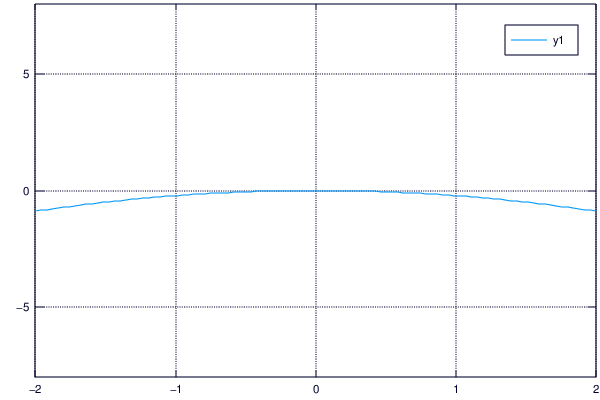

In [2]:
t = linspace(-2, 2, 100)
@manipulate for a = linspace(-2, 2, 10)
    plot(t, a * t.^2)
    ylims!(-8, 8)
end

Interact.Slider{Float64}(Signal{Float64}(2.4489795918367347, nactions=0),"t",2.4489795918367347,linspace(0.0,5.0,50),true)

Interact.Options{:ToggleButtons,Function}(Signal{Function}(sin, nactions=0),"u0",sin,"sin",Interact.OptionDict(Any["sin","cos","(anonymous function)"],Dict{Any,Any}("(anonymous function)"=>(anonymous function),"cos"=>cos,"sin"=>sin)),Any[],Any[])

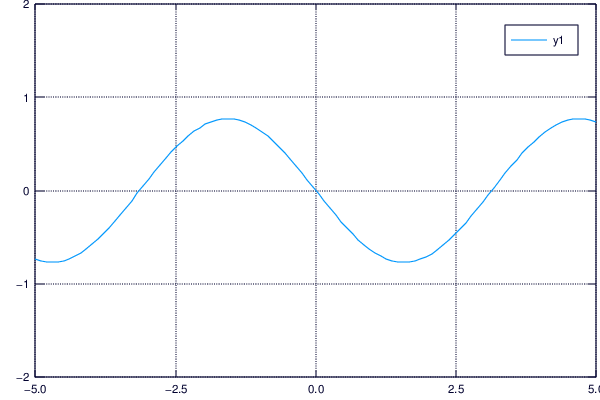

In [5]:
x = linspace(-5, 5, 100)
@manipulate for t = linspace(0, 5, 50), u0 = [sin, cos, x->exp(-x.^2)]
    plot(x, (u0(x+t)+u0(x-t))/2)
    ylims!(-2, 2)
end

## Tipos

Todos os elementos e variáveis no Julia tem um tipo

In [1]:
for x in Any[0, 1, 1.2, 1//2, "oi", true, false, [2.3;3.4]]
    println("Tipo de $x é $(typeof(x))")
end

Tipo de 0 é Int64
Tipo de 1 é Int64
Tipo de 1.2 é Float64
Tipo de 1//2 é Rational{Int64}
Tipo de oi é ASCIIString
Tipo de true é Bool
Tipo de false é Bool
Tipo de [2.3,3.4] é Array{Float64,1}


Os tipos herdam de outros, e a raiz de todos é o tipo `Any`.

In [2]:
Int64 <: Real <: Number <: Any

true

In [3]:
for x in Any[0, 1, 1.2, 1//2, "oi", true, false, [2.3;3.4]]
    print("$x: ")
    t = typeof(x)
    while t != Any
        print("$t <: ")
        t = super(t)
    end
    println("Any")
end

0: Int64 <: Signed <: Integer <: Real <: Number <: Any
1: Int64 <: Signed <: Integer <: Real <: Number <: Any
1.2: Float64 <: AbstractFloat <: Real <: Number <: Any
1//2: Rational{Int64} <: Real <: Number <: Any
oi: ASCIIString <: DirectIndexString <: AbstractString <: Any
true: Bool <: Integer <: Real <: Number <: Any
false: Bool <: Integer <: Real <: Number <: Any
[2.3,3.4]: Array{Float64,1} <: DenseArray{Float64,1} <: AbstractArray{Float64,1} <: Any


Isso em geral não nos afeta tanto, mas em alguns casos é importante notar a diferença.

In [4]:
function foo(x :: Int)
    return x + 1
end
foo(2)

3

In [7]:
foo(3.5) # Vai dar erro

LoadError: LoadError: MethodError: `foo` has no method matching foo(::Float64)
while loading In[7], in expression starting on line 1

### Despacho Múltiplo

In [8]:
function bar(x :: Int)
    return x + 1
end

function bar(x :: Float64)
    return x * 3
end

bar (generic function with 2 methods)

In [9]:
bar(3)

4

In [10]:
bar(3.0)

9.0

Em algumas situações é importante a distinção

In [11]:
function fatorial(n)
    if n < 0
        error("$n deve ser >= 0")
    elseif n == 0
        return 1
    end
    f = n
    while n != 1
        n = n - 1
        f = f * n
    end
    return f
end

fatorial (generic function with 1 method)

In [12]:
fatorial(3)

6

In [17]:
fatorial(3.0)

6.0

In [15]:
# fatorial(3.1) # Não rodar, pois vai travar.
# Se rodar, clique no Quadrado no topo

In [16]:
function fatorial2(n :: Int)
    if n < 0
        error("$n deve ser >= 0")
    elseif n == 0
        return 1
    end
    f = n
    while n != 1
        n = n - 1
        f = f * n
    end
    return f
end

fatorial2 (generic function with 1 method)

In [18]:
fatorial2(4)

24

In [20]:
fatorial2(4.0)

LoadError: LoadError: MethodError: `fatorial2` has no method matching fatorial2(::Float64)
while loading In[20], in expression starting on line 1

## BigInt e BigFloat

Como visto antes 0.1 + 0.2 - 0.3 $\approx 10^{-17}$.
O motivo desse valor vem da precisão da máquina para um float de 64 bits.

In [22]:
0.1 + 0.2 - 0.3 # Números da ordem de 0.1

5.551115123125783e-17

In [28]:
eps(Float64) * 0.1

2.2204460492503132e-17

Floats de precisão menor que essa não são muito utilizados se o sistema aguenta 64 bits. No entanto, floats de precisão maior são interessantes.

In [47]:
big"0.1" + big"0.2" - big"0.3"

0.000000000000000000000000000000000000000000000000000000000000000000000000000000

Esse valor é 0, mas com a quantidade mostrada de casas decimais.

Em geral, esses valores são "desprezíveis", porém devemos lembrar da máxima:

In [50]:
0.99^365

0.025517964452291125

In [51]:
1.01^365

37.78343433288728

Quando a taxa é exponencial, se ocorrerem iterações demais, veremos o erro.

In [62]:
(1 + eps(Float64))^1000000

1.0000000002220446

In [63]:
(1 + eps(BigFloat))^1000000

1.000000000000000000000000000000000000000000000000000000000000000000000017272337

Muito usando por pessoas tentando calcular mais casas do $\pi$.

In [64]:
function gauss_legendre()
    a, b, t, p = big"1", 1/sqrt(big"2"), 1/4, 1
    E = 1.0
    while E > eps(BigFloat)
        ap, b = (a+b)/2, sqrt(a*b)
        E = abs(ap-a)
        t, p, a = t-p*(a-ap)^2, 2*p, ap
    end
    return (a+b)^2/4t
end

gauss_legendre (generic function with 1 method)

In [65]:
gauss_legendre()

3.141592653589793238462643383279502884197169399375105820974944592307816406286198

In [66]:
set_bigfloat_precision(2^10)

1024

In [68]:
gauss_legendre()

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724587042